In [1]:
notebook = input('Номер ноутбука: ')

Номер ноутбука: 19


In [2]:
import sys
import math
import time
sys.path.insert(0, r'/home/danis/work/python_works/gamma_4/Scripts')
sys.path.insert(0, r'D:\Учеба\Практика\Диплом\gamma_4\Scripts')
import numpy as np
import pandas as pd
from materials import*
import matplotlib.pyplot as plt
from garipov_deconvolution import get_coeff_simpson
from garipov_deconvolution import Gold

Минимальная энергия: 1e-3
windows (w) or linux (l): w


In [3]:
linspace1 = np.linspace(0.035, 0.1, 25, dtype=np.float32)
linspace2 = np.geomspace(0.11, 3, 25, dtype=np.float32)

beams_energyes = []
beams_energyes.extend(linspace1)
beams_energyes.extend(linspace2)

In [4]:
m = 70
target = R(Material(m), 0.01)

brems = [target.brem(beams_energy) for beams_energy in beams_energyes]
brems_e = [brem * en for brem in brems]

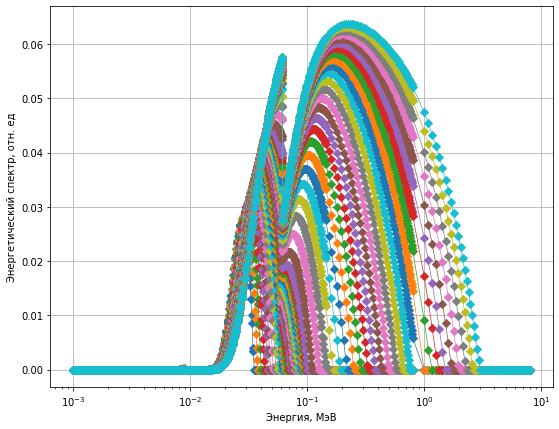

In [5]:
fig, ax = plt.subplots(figsize=(9, 7))

for br in brems_e:
    ax.plot(en, br, ls='-', marker='D', lw='0.7', ms=5)

# настройки графика
ax.set_xlabel('Энергия, МэВ', fontsize=10)
ax.set_ylabel('Энергетический спектр, отн. ед', fontsize=10)
ax.tick_params(axis='both', labelsize=10)

ax.set_xscale('log')
# ax.set_yscale('log')
# ax.set_xlim(1e-3, 0.1e0)
# ax.set_ylim(1e-7, 1.2)

ax.grid(True)

# fig.savefig('Тормозной спектр.jpg', bbox_inches='tight')

In [6]:
n = 11

In [7]:
# Индексы К скачков
EDGE = []
for i in range(1, len(en)):
    if en[i - 1] == en[i]:
        EDGE.append(i - 1)

In [8]:
EDGE.remove(EDGE[EDGE.index(Material(m).k_index())])

Спектральные характеристики чувствительности каналов

In [9]:
def ross_by_k_level(num_1, num_2, level):
    t_2 = Material(num_2).lt(level)
    f_2 = R(Material(num_2), Material(num_2).lt(level)).f()
    t_1 = Material(num_1).lt(R(Material(num_2), Material(num_2).lt(level)).f()[Material(num_1).k_index()])
    f_1 = R(Material(num_1), t_1).f()
    return f_2 - f_1

In [10]:
def signals_from_one_spectrum(spectrum, matrix, new_en):
    
    start_time = time.time()
    signals = []
        
    # для каждой строки в матрице
    for row in matrix:
        # значение одного сигнала
        signal = sum(row * np.interp(new_en, en, spectrum))
        signals.append(signal)
        
    return signals

In [11]:
def func_to_optimize(level, spectrum):
    start_time = time.time()
    resp_ross = [ross_by_k_level(i, i+1, level) for i in range(n, 100)]
    new_en = get_coeff_simpson(resp_ross[0], en, EDGE)[1]
    
    Matrixs = []
    for response in resp_ross:
        Matrixs.append(get_coeff_simpson(response, en, EDGE)[0])
        
    signals_simpson = signals_from_one_spectrum(spectrum, Matrixs, new_en)
    
    sp = [0 for i in range(len(resp_ross))]
    norm = [0 for i in range(len(resp_ross))]
    decb = [0 for i in range(len(resp_ross))]
    dev = [0 for i in range(len(resp_ross))]

    new_en = get_coeff_simpson(resp_ross[0], en, EDGE)[1]
    sp, norm, dev = Gold(Matrixs, signals_simpson, en, spectrum, new_en, 1, 10000, w=True, d=False)[:3]
    print(f'{round((time.time() - start_time), 5)} секунд')
    return dev

In [12]:
from scipy.optimize import minimize

In [ ]:
deviations = []
optimize_levels = []

init_level = 0.3
counter = 1

for brem in brems_e:
    start = time.time()
    result = minimize(lambda l: func_to_optimize(l, brem), x0=init_level, bounds=([0.05, 0.8],), method='TNC')
    optimize_levels.append(result.x)
    deviations.append(result.fun)
    print(f'ВЫПОЛНЕНО {counter}  из {len(brems_e)}, время: {round(time.time()-start, 6)} секунд')
    counter += 1

14.63614 секунд
10.26119 секунд
9.35241 секунд
9.06003 секунд
8.94386 секунд
9.00135 секунд
ВЫПОЛНЕНО 1  из 50, время: 61.260526 секунд
9.07137 секунд
8.91835 секунд
8.77512 секунд
8.6923 секунд
8.87212 секунд
8.99814 секунд
8.94649 секунд
8.73153 секунд
8.88684 секунд
8.87064 секунд
9.07639 секунд
9.0182 секунд
8.74818 секунд
8.82125 секунд
ВЫПОЛНЕНО 2  из 50, время: 124.442551 секунд
9.0032 секунд
8.95986 секунд
8.75673 секунд
8.62906 секунд
8.94863 секунд
9.0734 секунд
ВЫПОЛНЕНО 3  из 50, время: 53.417743 секунд
8.94859 секунд
8.71179 секунд
8.65211 секунд
8.87738 секунд
8.95868 секунд
8.79044 секунд
8.7184 секунд
9.136 секунд
9.14983 секунд
9.16825 секунд
9.13855 секунд
9.4626 секунд
9.49144 секунд
9.26041 секунд
8.93773 секунд
9.01013 секунд
8.99345 секунд
9.20211 секунд
8.94606 секунд
8.9502 секунд
9.51353 секунд
9.11084 секунд
9.33849 секунд
9.26939 секунд
9.00525 секунд
8.75241 секунд
8.97576 секунд
9.35951 секунд
9.31596 секунд
9.08207 секунд
8.86693 секунд
9.05689 секунд
9.15

8.90957 секунд
8.75007 секунд
8.89033 секунд
9.00724 секунд
8.91372 секунд
8.96246 секунд
9.21707 секунд
9.20403 секунд
9.01212 секунд
8.84929 секунд
8.94551 секунд
9.04083 секунд
9.09312 секунд
8.99689 секунд
8.86088 секунд
8.93014 секунд
9.16905 секунд
9.12681 секунд
8.93087 секунд
8.86906 секунд
9.00477 секунд
9.05634 секунд
8.98421 секунд
8.92125 секунд
8.85983 секунд
8.96902 секунд
9.17342 секунд
9.06098 секунд
8.89174 секунд
8.8833 секунд
9.09972 секунд
9.0112 секунд
9.04638 секунд
8.88686 секунд
8.93486 секунд
9.1643 секунд
9.10556 секунд
9.02739 секунд
8.8698 секунд
8.79106 секунд
9.124 секунд
8.87007 секунд
9.01772 секунд
8.88735 секунд
9.03336 секунд
9.15757 секунд
9.08202 секунд
8.93186 секунд
8.85851 секунд
9.04151 секунд
9.13306 секунд
9.03398 секунд
8.80525 секунд
8.86213 секунд
8.96819 секунд
8.87557 секунд
8.96047 секунд
8.84718 секунд
8.91312 секунд
9.1579 секунд
9.08078 секунд
8.94784 секунд
8.84535 секунд
8.97372 секунд
9.15833 секунд
9.10592 секунд
8.91938 секунд
8.

9.17469 секунд
9.06962 секунд
9.05919 секунд
8.96562 секунд
9.03737 секунд
9.17257 секунд
9.52266 секунд
9.32235 секунд
9.16511 секунд
9.14002 секунд
9.29821 секунд
9.14954 секунд
9.01525 секунд
9.02633 секунд
9.43231 секунд
9.4682 секунд
9.77006 секунд
9.35863 секунд
8.89244 секунд
10.07805 секунд
9.84295 секунд
9.97623 секунд
9.57149 секунд
9.54607 секунд
9.82519 секунд
10.22502 секунд
10.9218 секунд
9.25872 секунд
10.01022 секунд
10.61023 секунд
9.98596 секунд
9.3892 секунд
ВЫПОЛНЕНО 18  из 50, время: 378.303124 секунд
9.15494 секунд
9.51109 секунд
9.35752 секунд
9.28471 секунд
9.06552 секунд
10.21662 секунд
10.60464 секунд
10.66947 секунд
9.28617 секунд
10.00226 секунд
9.64681 секунд
9.52709 секунд
9.2808 секунд
9.26891 секунд
10.15297 секунд
10.71787 секунд
9.61692 секунд
9.55624 секунд
10.15281 секунд
10.27243 секунд
10.44497 секунд
9.83378 секунд
9.27309 секунд
9.35809 секунд
9.38987 секунд
9.28403 секунд
8.98548 секунд
9.162 секунд
9.58894 секунд
9.56919 секунд
9.42347 секунд
9

In [ ]:
np.save(f'Notebook_{notebook}_DEV_ross_m{m}.npy', deviations)
np.save(f'Notebook_{notebook}_OPTLEV_ross_m{m}.npy', optimize_levels)

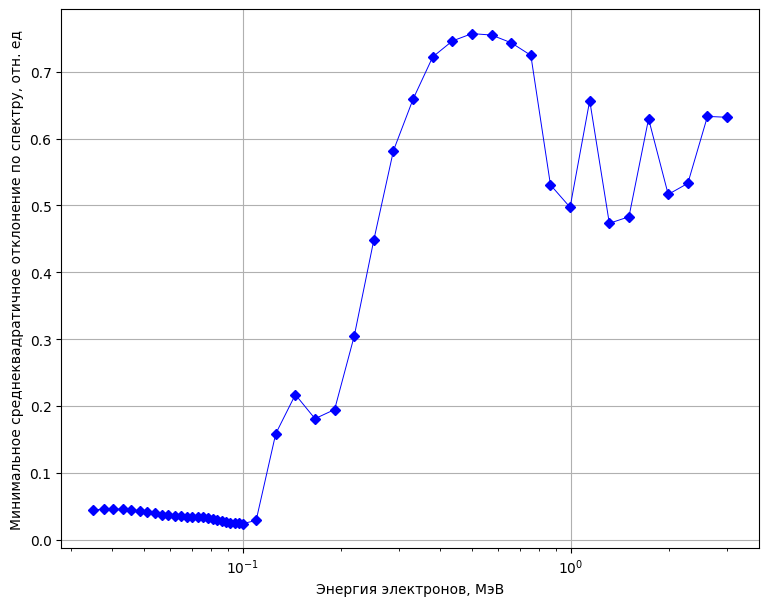

In [115]:
fig, ax = plt.subplots(figsize=(9, 7))

ax.plot(beams_energyes, deviations, ls='-', marker='D', lw='0.7', ms=5, color='blue')

# настройки графика
ax.set_xlabel('Энергия электронов, МэВ', fontsize=10)
ax.set_ylabel('Минимальное среднеквадратичное отклонение по спектру, отн. ед', fontsize=10)
ax.tick_params(axis='both', labelsize=10)
ax.set_xscale('log')
# ax.set_yscale('log')
ax.grid(True)

# fig.savefig('Фильтры_Росса_минимум_ошибки_восстановления_от_энергии_электронов.jpg', bbox_inches='tight')

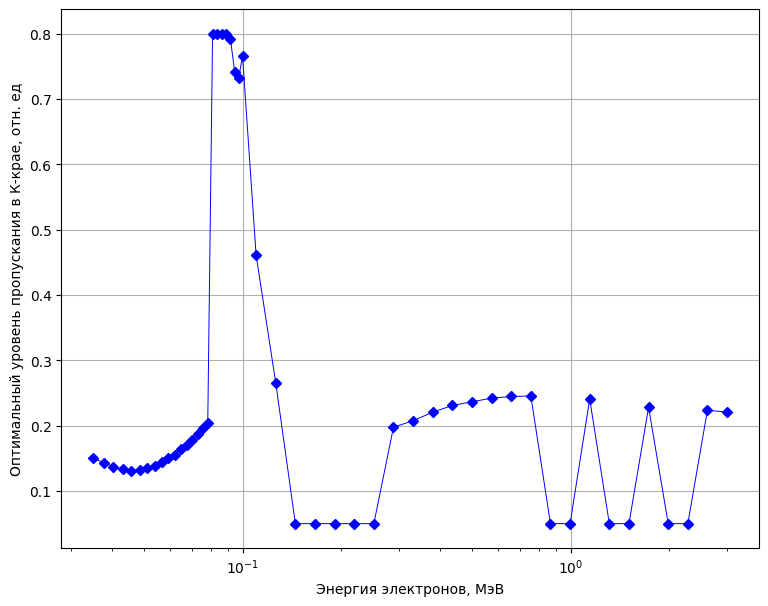

In [120]:
fig, ax = plt.subplots(figsize=(9, 7))

ax.plot(beams_energyes, optimize_levels, ls='-', marker='D', lw='0.7', ms=5, color='blue')

# настройки графика
ax.set_xlabel('Энергия электронов, МэВ', fontsize=10)
ax.set_ylabel('Оптимальный уровень пропускания в К-крае, отн. ед', fontsize=10)
ax.tick_params(axis='both', labelsize=10)
ax.set_xscale('log')
# ax.set_yscale('log')
ax.grid(True)

# fig.savefig('Фильтры_Росса_минимум_ошибки_восстановления_от_энергии_электронов.jpg', bbox_inches='tight')